In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import re,string

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\delos001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split, KFold

In [7]:
#this function will process documents

def clean_doc(doc): 
    #split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 4]
    
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]         
    
    # word stemming    
    ps=PorterStemmer()
    tokens=[ps.stem(word) for word in tokens]
    return tokens

In [27]:
#this function will cretae label encoding
def One_Hot(variable):
    LE=LabelEncoder()
    LE.fit(variable)
    Label1=LE.transform(variable)
    OHE=OneHotEncoder()
    labels=OHE.fit_transform(Label1.reshape(-1,1)).toarray()
    return labels, LE, OHE

In [9]:
#set working Directory to where class corpus is saved.
os.chdir('D:\\OneDrive - QJA\\My Files\\NW Coursework\\Predict 453 Natural Language Processesing\\Class Corpus')

In [10]:
#put text into lists
#read in class corpus csv into python
data=pd.read_csv('Class Corpus.csv')


In [11]:
data.head()

,Unnamed: 0,DSI_Title,Text
0,0,AC_Doc1_Trump-Trade-S-Korea.docx,President Donald Trump just signed his first t...
1,1,AC_Doc2_Trump-Trade-China.docx,After four months of negotiation and tit-for-t...
2,2,AK_Doc1_President_Donald_Trump_praised.docx,President Donald Trump praised his Supreme Cou...
3,3,AK_Doc2_ Senate_Republicans_have_pushed.docx,Senate Republicans have pushed Brett Kavanaugh...
4,4,ATS_Doc1_White-House-Tells.docx,The White House authorized the F.B.I. to expan...


In [12]:
#show number of observations (rows)
len(data["Text"])

38

In [13]:
#get character count in each DSI (text column)
text_len = []
for i in data["Text"]:
    text_len.append(len(i))

In [14]:
#show min and max of character count
min(text_len), max(text_len)

(860, 3632)

In [15]:
#get the word count for each DSI (text column)
text_cnt = []
for i in data["Text"]:
    text_cnt.append(len(re.findall(r'\w+',i)))


In [16]:
text_cnt

[581,
 604,
 384,
 133,
 542,
 506,
 511,
 499,
 503,
 522,
 500,
 569,
 364,
 445,
 586,
 556,
 554,
 530,
 529,
 497,
 515,
 500,
 517,
 500,
 514,
 556,
 510,
 552,
 472,
 537,
 525,
 512,
 466,
 523,
 303,
 433,
 519,
 504]

In [17]:
#get min, max, total and average word count
min(text_cnt), max(text_cnt), sum(text_cnt), sum(text_cnt)/len(text_cnt)

(133, 604, 18873, 496.6578947368421)

In [18]:
#create empty list to store text documents titles
titles=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(data)):
    temp_text=data['DSI_Title'].iloc[i]
    titles.append(temp_text)


#create empty list to store text documents
text_body=[]

#for loop which appends the text to the text_body list
for i in range(0,len(data)):
    temp_text=data['Text'].iloc[i]
    text_body.append(temp_text)
    
#Note: the text_body is the unprocessed list of documents read directly form 
#the csv.
    
#empty list to store processed documents
processed_text=[]
#for loop to process the text to the processed_text list
for i in text_body:
    text=clean_doc(i)  #clean_doc is function defined above
    processed_text.append(text)

    
#Note: the processed_text is the PROCESSED list of documents read directly form 
#the csv.  Note the list of words is separated by commas.

#stitch back together individual words to reform body of text
final_processed_text=[]
for i in processed_text:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text.append(temp_DSI)
    
#Note: We stitched the processed text together so the TFIDF vectorizer can work.
#Final section of code has 3 lists used.  2 of which are used for further processing.
#(1) text_body - unused, (2) processed_text (used in W2V), 
#(3) final_processed_text (used in TFIDF), and (4) DSI titles (used in TFIDF Matrix)

In [23]:
#to see the lists created above, remove # one at a time

#titles  #used for TFIDF matrix
#text_body
#processed_text  #used in W2V
#final_processed_text  #used in TFIDF

[['presid',
  'donald',
  'trump',
  'sign',
  'first',
  'trade',
  'meet',
  'monday',
  'trump',
  'south',
  'korean',
  'presid',
  'jaein',
  'sign',
  'revis',
  'version',
  'unit',
  'stateskorea',
  'trade',
  'agreement',
  'known',
  'koru',
  'clear',
  'brand',
  'koru',
  'around',
  'sinc',
  'version',
  'remov',
  'regulatori',
  'burden',
  'automak',
  'export',
  'extend',
  'percent',
  'tariff',
  'import',
  'korean',
  'truck',
  'lift',
  'export',
  'south',
  'korea',
  'korean',
  'safeti',
  'standard',
  'american',
  'automak',
  'anywher',
  'close',
  'reach',
  'sixyearold',
  'trade',
  'allow',
  'countri',
  'billion',
  'machineri',
  'good',
  'restrict',
  'south',
  'korea',
  'sixthlargest',
  'trade',
  'partner',
  'howev',
  'trump',
  'administr',
  'unhappi',
  'south',
  'korea',
  'sell',
  'stuff',
  'american',
  'unit',
  'state',
  'sell',
  'south',
  'korean',
  'american',
  'south',
  'korean',
  'cheap',
  'steel',
  'larg',
  

In [24]:
### Sklearn TFIDF 

#Call Tfidf Vectorizer
Tfidf=TfidfVectorizer()

#fit the vectorizer using final processed documents.  The vectorizer requires the 
#stiched back together document.
TFIDF_matrix=Tfidf.fit_transform(final_processed_text)     

#creating datafram from TFIDF Matrix
matrix=pd.DataFrame(TFIDF_matrix.toarray(), 
                    columns=Tfidf.get_feature_names(), index=titles)
#can export matrix to csv and explore further if necessary

In [29]:
TFIDF_matrix

<38x2232 sparse matrix of type '<class 'numpy.float64'>'
	with 5329 stored elements in Compressed Sparse Row format>

In [31]:
TFIDF_matrix.max

<bound method _minmax_mixin.max of <38x2232 sparse matrix of type '<class 'numpy.float64'>'
	with 5329 stored elements in Compressed Sparse Row format>>

In [118]:
matrix.to_csv("matrix.csv")

In [32]:
### Gensim Word2vec 

#word to vec
model_w2v = Word2Vec(processed_text, size=100, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}
#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

    
#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

In [33]:
w2v_df.to_csv("w2v_matrix.csv")

In [34]:
len(w2v_words)

2232

In [31]:
###########################
#
#    K Means Clustering
#
###########################

In [112]:
#set paramaters for KMeans cluster and create variable to contain
#list of clusters from the TDIF matrix created above

k=3

km = KMeans(n_clusters=k, random_state=89)
km.fit(TFIDF_matrix)
clusters=km.labels_.tolist()

In [113]:
#create data frame to hold the cluster names
terms = Tfidf.get_feature_names()
Dictionary = {'Doc_Name':titles, 'Cluster':clusters, 'Text':final_processed_text}
frame = pd.DataFrame(Dictionary, columns=['Cluster', 'Doc_Name', 'Text'])

print('Top terms per cluster: ')

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms_dict = []

#save the terms for each cluster and document to dictionaies for plotting later
#dictionary to store terms and titles
cluster_terms={}
cluster_title={}

for i in range(k):
    print('Cluster %d:' %i),
    temp_terms=[]
    temp_titles=[]
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
        terms_dict.append(terms[ind])
        temp_terms.append(terms[ind])
    cluster_terms[i] = temp_terms
    
    print('Cluster %d titles:' % i, end='')
    temp = frame[frame['Cluster']==i]
    for title in temp['Doc_Name']:
        print(' %s, ' % title, end = '')
        temp_titles.append(title)
    cluster_title[i] = temp_titles

Top terms per cluster: 
Cluster 0:
 trade
 trump
 canada
 unit
 china
 agreement
 tariff
 state
 sanction
 presid
Cluster 0 titles: AC_Doc1_Trump-Trade-S-Korea.docx,  AC_Doc2_Trump-Trade-China.docx,  CMM_Doc1_Its-Complete-Folly_googleDrive.docx,  CMM_Doc2_Trump-Officials-Target_googleDrive.docx,  EYM_Doc1_Trumps-Immigration-Reversal.docx,  HJC_DSI1_US_expects_to_eliminate_Iranian_oil_imports.docx,  HJC_DSI2_Trump's_battering_of_Iran_the_cost_of_oil.docx,  JEN_Doc1_Russia-has-never-interfered.docx,  JMD_Doc1_Tweet-Had-Extra-Zero.docx,  JMD_Doc2_4.1-GDP-Growth.docx,  JMK_Doc1_Is-China-losing-the-trade-war-against-America.docx,  JMK_Doc2_Donald-Trump-agrees-to-cease-fire-in-the-trade-war-with-the-EU.docx,  MET_Doc1_Transcript-Press-Conference.docx,  MET_Doc2_Trump_Tweets.docx,  PKC_Doc1_US-Canada-NAFTA.docx,  PKC_Doc2_More-US-Canada-NAFTA.docx,  RJB_Doc1_Mexican_President_Insists_Trilateral_NAFTA.docx,  RJB_Doc2_Canada_US_Reach_NAFTA_Deal.docx,  RT_Doc1_Corp_Execs_describe_trump_mgmt_styl

In [114]:
###############################
#
# Plotting
#
###############################

In [115]:
#convert 2 componenets in a two dimensional plane
#"pre-computed" because we provide a distance matrix
#also specifies 'random_state' so the plot is reproduceable

mds = MDS(n_components = 2, dissimilarity = 'precomputed', random_state = 1)
dist = 1 - cosine_similarity(TFIDF_matrix)

pos = mds.fit_transform(dist)  # shape (n_coponents), n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [116]:
#set colors per cluster using a dict where numb of colors must = k
cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown',
                 4: 'firebrick', 5: 'red', 6: 'darksalmon', 7: 'sienna'}

#setup cluster names using dict
cluster_dict = cluster_title

#create df that has result of MDS plus cluster numbers and title
df = pd.DataFrame(dict(x = xs, y = ys, label = clusters,
                      title = range(0, len(clusters))))

#grouop by cluster
groups = df.groupby('label')


In [117]:
cluster_dict

{0: ['AC_Doc1_Trump-Trade-S-Korea.docx',
  'AC_Doc2_Trump-Trade-China.docx',
  'CMM_Doc1_Its-Complete-Folly_googleDrive.docx',
  'CMM_Doc2_Trump-Officials-Target_googleDrive.docx',
  'EYM_Doc1_Trumps-Immigration-Reversal.docx',
  'HJC_DSI1_US_expects_to_eliminate_Iranian_oil_imports.docx',
  "HJC_DSI2_Trump's_battering_of_Iran_the_cost_of_oil.docx",
  'JEN_Doc1_Russia-has-never-interfered.docx',
  'JMD_Doc1_Tweet-Had-Extra-Zero.docx',
  'JMD_Doc2_4.1-GDP-Growth.docx',
  'JMK_Doc1_Is-China-losing-the-trade-war-against-America.docx',
  'JMK_Doc2_Donald-Trump-agrees-to-cease-fire-in-the-trade-war-with-the-EU.docx',
  'MET_Doc1_Transcript-Press-Conference.docx',
  'MET_Doc2_Trump_Tweets.docx',
  'PKC_Doc1_US-Canada-NAFTA.docx',
  'PKC_Doc2_More-US-Canada-NAFTA.docx',
  'RJB_Doc1_Mexican_President_Insists_Trilateral_NAFTA.docx',
  'RJB_Doc2_Canada_US_Reach_NAFTA_Deal.docx',
  'RT_Doc1_Corp_Execs_describe_trump_mgmt_style_no_meta.docx',
  'SF Rouhani Trump administration most ‘spiteful’ to I

In [118]:
df

,x,y,label,title
0,0.716980,0.019638,0,0
1,0.533015,0.184711,0,1
2,-0.226764,-0.443089,2,2
3,-0.296748,-0.623581,2,3
4,-0.480911,-0.309643,2,4
5,-0.636112,-0.216755,2,5
6,-0.496812,0.463899,0,6
7,-0.479411,0.331757,0,7
8,0.213084,-0.590735,0,8
9,0.289061,-0.664947,1,9


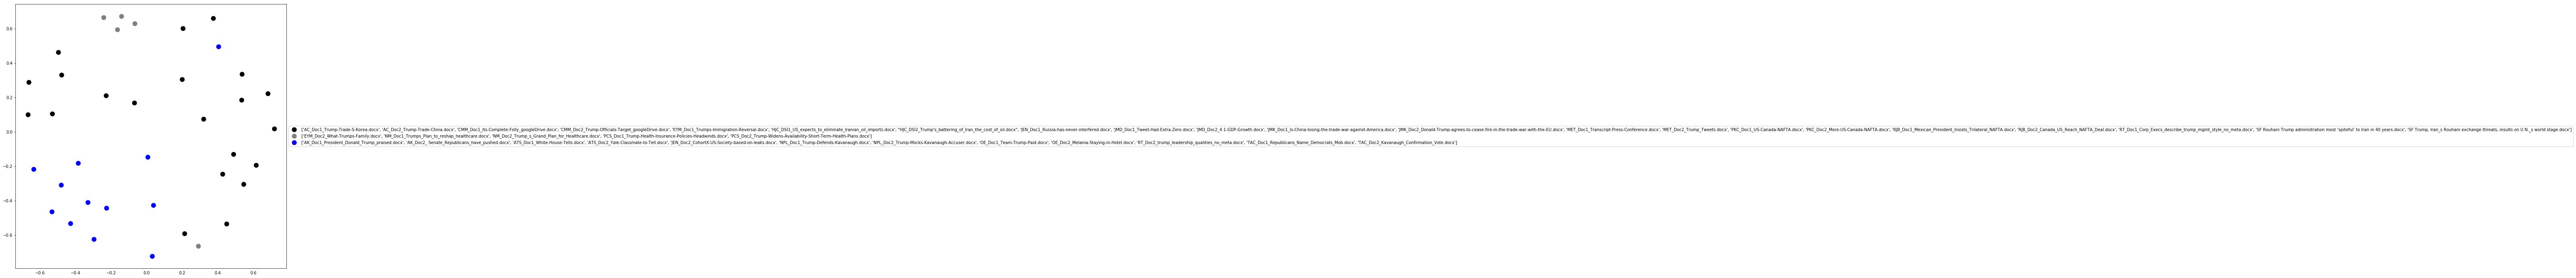

In [119]:
#set figure specs

fig, ax = plt.subplots(figsize = (12, 12)) #figure size
ax.margins(0.05)  #optional: adds 5% padding to autoscale


#iterate through groups to layer plot
#note: cluster_name and cluster_color dicts are used with 'name'
#lookup to return appropriate color/label

for name, group in groups:
    ax.plot(group.x, group.y, marker = 'o', linestyle = '', ms = 12,
           label = cluster_dict[name], color = cluster_colors[name],
           mec = 'none')
    
    ax.set_aspect('auto')
    ax.tick_params(\
                  axis = 'x', #changes apply to x-axis
                  which = 'both', #both mj and mn ticks are affected
                  bottom = False, #ticks along bottom edge are off
                  top = False, #ticks along bottom edge are off
                  labelbottom = True)
    
    ax.tick_params(\
                   axis = 'y', #changes apply to y-axis
                   which = 'both', #both mj and mn ticks are affected
                   bottom = False, #ticks along bottom edge are off
                   top = False, #ticks along bottom edge are off
                   labelleft = True)
    ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5)) #show legend with only 1pt

In [ ]:
########################################
#
#    Doc2Vec
#
#######################################

In [141]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)
doc2vec_df=pd.DataFrame()

for i in range(0,len(processed_text)):
    vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)
    
doc2vec_df=doc2vec_df.reset_index()

doc_titles={'title': titles}
t=pd.DataFrame(doc_titles)

doc2vec_df=pd.concat([doc2vec_df,t], axis=1)
doc2vec_df=doc2vec_df.drop('index', axis=1)

In [143]:
t

,title
0,AC_Doc1_Trump-Trade-S-Korea.docx
1,AC_Doc2_Trump-Trade-China.docx
2,AK_Doc1_President_Donald_Trump_praised.docx
3,AK_Doc2_ Senate_Republicans_have_pushed.docx
4,ATS_Doc1_White-House-Tells.docx
5,ATS_Doc2_Yale-Classmate-to-Tell.docx
6,CMM_Doc1_Its-Complete-Folly_googleDrive.docx
7,CMM_Doc2_Trump-Officials-Target_googleDrive.docx
8,EYM_Doc1_Trumps-Immigration-Reversal.docx
9,EYM_Doc2_What-Trumps-Family.docx


In [94]:
########################################
#
#    K Means Clustering Doc2Vec
#
#######################################

In [144]:
doc2vec_k_means=doc2vec_df.drop('title', axis=1)

k=8

km = KMeans(n_clusters=k, random_state =89)
km.fit(doc2vec_k_means)
clusters_d2v = km.labels_.tolist()

Dictionary={'Doc Name':titles, 'Cluster':clusters_d2v,  'Text': final_processed_text}

frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

#dictionary to store terms and titles
cluster_title={}

for i in range(k):
    temp=frame[frame['Cluster']==i]
    temp_title_list=[]
    for title in temp['Doc Name']:
        temp_title_list.append(title)
    cluster_title[i]=temp_title_list

In [96]:
########################################
#
#    Plotting Doc2Vec
#
#######################################

In [145]:
#convert 2 components to plot in 2D plane
#pre-computed because we provide distance matrix
#specifies 'random_state' so the plot is reproducable

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

dist = 1 - cosine_similarity(doc2vec_k_means)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

#set colors per cluster using a dict where numb of colors must = k
cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown', 
                  4: 'firebrick',5:'red', 6:'darksalmon', 7:'sienna'}

#setup cluster names using dict
cluster_dict=cluster_title

#create df that has result of MDS plus cluster numbers and title
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters))))

#grouop by cluster
groups = df.groupby('label')

In [146]:
cluster_dict

{0: ['ATS_Doc1_White-House-Tells.docx',
  'CMM_Doc1_Its-Complete-Folly_googleDrive.docx',
  'PCS_Doc1_Trump-Health-Insurance-Policies-Headwinds.docx'],
 1: ['AC_Doc1_Trump-Trade-S-Korea.docx',
  'AC_Doc2_Trump-Trade-China.docx',
  'AK_Doc2_ Senate_Republicans_have_pushed.docx',
  'ATS_Doc2_Yale-Classmate-to-Tell.docx',
  'CMM_Doc2_Trump-Officials-Target_googleDrive.docx',
  'EYM_Doc1_Trumps-Immigration-Reversal.docx',
  'JMK_Doc2_Donald-Trump-agrees-to-cease-fire-in-the-trade-war-with-the-EU.docx',
  'NPL_Doc1_Trump-Defends-Kavanaugh.docx',
  'NPL_Doc2_Trump-Mocks-Kavanaugh-Accuser.docx'],
 2: ['HJC_DSI1_US_expects_to_eliminate_Iranian_oil_imports.docx',
  'OE_Doc1_Team-Trump-Paid.docx',
  'PKC_Doc2_More-US-Canada-NAFTA.docx'],
 3: ['MET_Doc1_Transcript-Press-Conference.docx',
  'OE_Doc2_Melania-Staying-in-Hotel.docx',
  'PKC_Doc1_US-Canada-NAFTA.docx',
  'RT_Doc2_trump_leadership_qualities_no_meta.docx',
  'SF Rouhani Trump administration most ‘spiteful’ to Iran in 40 years.docx',
  '

In [147]:
groups.head()

,x,y,label,title
0,0.602878,-0.336995,2,0
1,0.491440,0.542186,2,1
2,0.624057,0.401982,1,2
3,0.748865,0.026041,1,3
4,-0.726163,0.265840,1,4
5,-0.292255,0.711672,1,5
6,-0.617300,0.380351,4,6
7,-0.392160,0.496996,4,7
8,-0.043373,-0.802765,7,8
9,0.161770,-0.512654,7,9


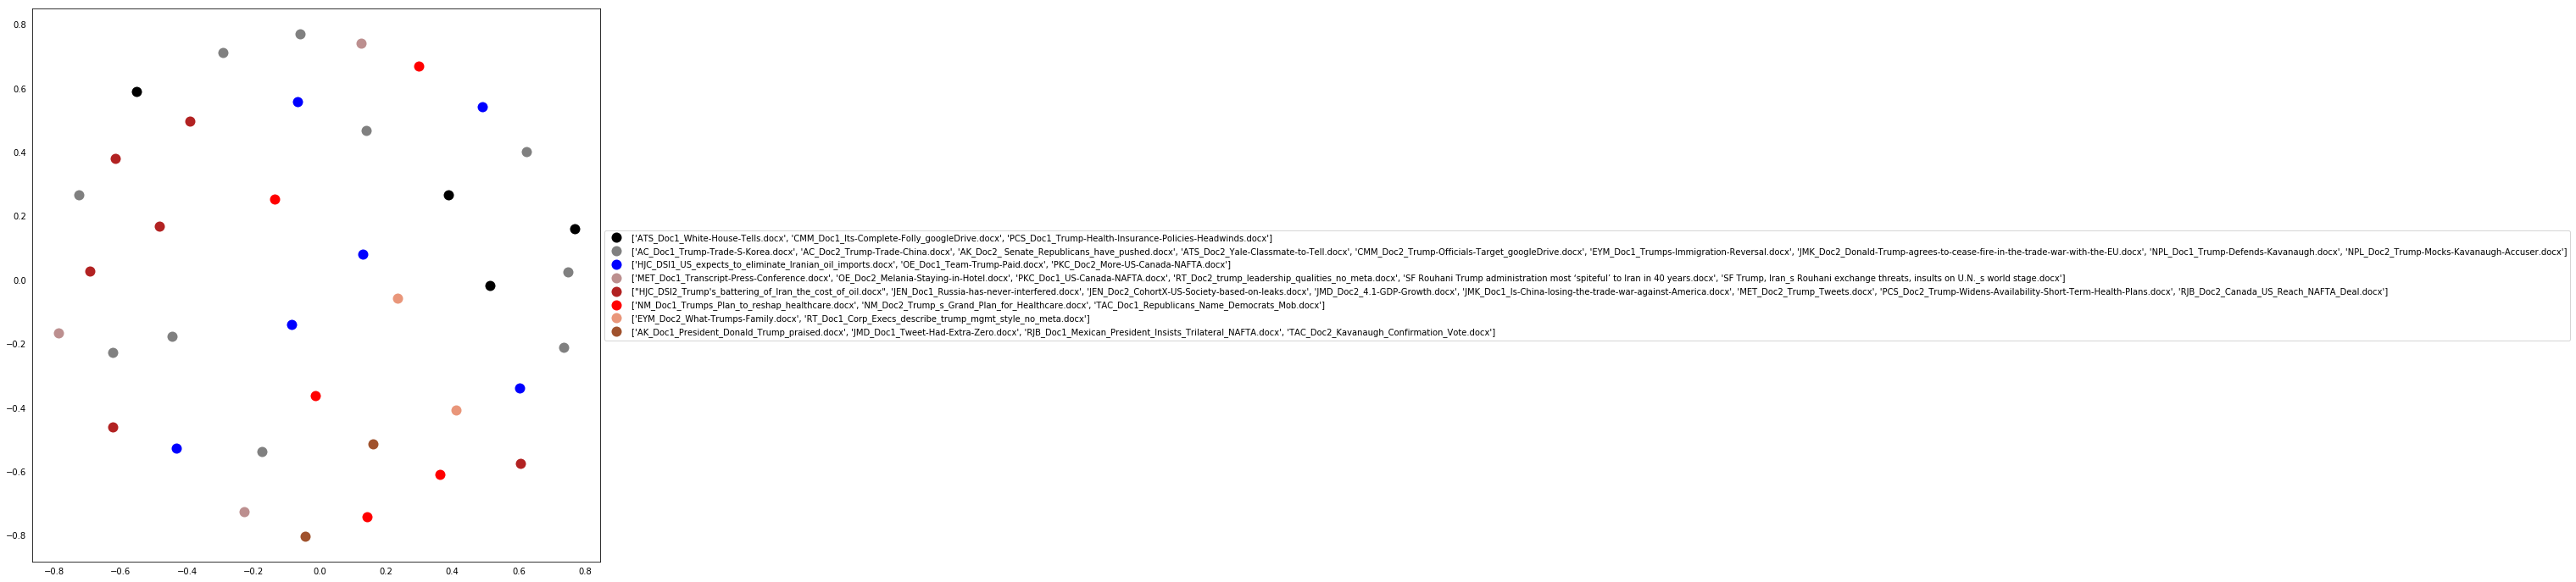

In [150]:
#set figure specs

fig, ax = plt.subplots(figsize=(12, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


#iterate through groups to layer plot
#note: cluster_name and cluster_color dicts are used with 'name'
#lookup to return appropriate color/label

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_dict[name], color=cluster_colors[name],
            mec='none')
    
    ax.set_aspect('auto')
    
    ax.tick_params(\
                   axis= 'x',          # changes apply to the x-axis
                   which='both',      # both major and minor ticks are affected
                   bottom=False,      # ticks along the bottom edge are off
                   top=False,         # ticks along the top edge are off
                   labelbottom=True)
    
    ax.tick_params(\
                   axis= 'y',         # changes apply to the y-axis
                   which='both',      # both major and minor ticks are affected
                   left=False,      # ticks along the bottom edge are off
                   top=False,         # ticks along the top edge are off
                   labelleft=True)
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   #show legend with only 1 point

In [ ]:
######################################
#
#        Random Forest Classification
#
######################################

In [77]:
model_RF = RandomForestClassifier()

#TDIDF
y = clusters
x = TFIDF_matrix

#cross validation
cv_score = cross_val_score(model_RF, x, y, cv=7)

#mean CV score
np.mean(cv_score)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)


0.69671201814058947

In [79]:
#Doc2Vec

y_d2v = cluster_d2v
x_d2v = doc2vec_k_means

#cross validation
cv_score = cross_val_score(model_RF, x_d2v, y_d2v, cv=7)

#mean CV score
np.mean(cv_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)


0.25430839002267575

In [ ]:
######################################
#
#        Equivalency Class Clean up
#
######################################

In [80]:
dictionary = {'trump': ['donald', 'president donald trump']}
test = final_processed_text[0]

def equivalence_class(dictionary, text):
    for k, v in dictionary.items():
        for i in dictionary[k]:
            processed_text = text.replace(k, i)
    return processed_text

In [6]:
Trump_dictionary = {
	'donald trump': ['trump', 'president trump', 'president donald trump',
		'mr trump', 'trumps', 'trump organization', 'donald j trump'],
	'trump administration': ['senior trump administration officials', 'the white house',
		'trump administration', 'trump administration officials', 'federal government', 'us official',
		'us officials', 'us government', 'donald trumps top economic advisors', 'white house sources',
		'state department official', 'the official', 'washington', 'washingtons', 'the administration',
		'white house source', 'administration officials'],
	'donald mcgahan': ['white house counsel donald f mcgahan II', 'don mcgahn', 'don f mcgahn'],
	'john bolton': ['mr bolton', 'national security advisor john bolton', 'bolton'],
	'mike pompeo': ['secretary of state mike pompeo', 'pompeo'],
	'kirstjen nielsen': ['homeland security secretary kirstjen nielsen'],
	'keven hassett': ['chairman of white house council of economic advisers', 'hassett'],
	'sarah sanders': ['sarah huckabee sanders', 'white house press secretary sarah huckabee sanders',
		'sanders', 'press secretary sanders'],
	'sonny perdue': ['mr trumps agriculture secretary', 'sonny perdue mr trumps agriculture secretary',
		'mr perdue', 'mr perdues'],
	'mitch mcconnell': ['senate majority leader mitch mcconnell', 'mcconnell', 'senator mitch mcconnell',
		'majority leader', 'mr mcconnell'],
	'jeff flake': ['senator jeff flake', 'sen jeff flake'],
	'chuck grassley': ['grassley', 'sen grassley', 'senator grassley'],
	'susan collins': ['sen susan collins', 'r-maine', 'senator collins', 'senator susan collins'],
	'bernie sanders': ['sen bernie sanders', 'senator bernie sanders'],
	'chuck schumer': ['democratic majority leader', 'democratic majority leader chuck schumer'],	
	'brett kavanaugh': ['kavanaugh', 'supreme court pick', 'supreme court nominee', 'judge brett m kavanaugh',
		'brett m kavanaugh', 'mr kavanaugh', 'president trumps nominee', 'nominee for the supreme court',
		'judge kavanaugh', 'supreme court nominee brett kavanaugh', 'brett', 'judge brett kavanaugh'],
	'brett kavanaugh accuser': ['deborah ramirez', 'christine blasey ford', 'charles ludington',
		'julie swetnick'],
	'brett kavanaugh friend': ['mark judge', 'pj smyth'],
	'christine blasey ford': ['dr ford', 'christine ford', 'ford'],
	'stephanie clifford': ['ex porn star stormy daniels', 'stormy daniels', 'clifford', 'ms daniels'],
	'michael cohen': ['a lawyer for donald trump', 'cohen'],
	'melania trump': ['third wife melania', 'first lady', 'melania'],	
	'george w bush': ['president george w bush'],
	'barack obama': ['president barack obama', 'obama', 'obama administration', 'former president'],
	'chuck hagel': ['former defense secretary chuck hagel', 'hagel', 
		'defense secretary for president barack obama'],
	'hillary clinton': ['hillary', 'former us presidential candidate hillary clinton'],
	'john podestra': ['hillary clintons campaign chairman', 'podestra'],
	'julian assange': ['wikileaks founder julian assange', 'assange'],
	'robert mueller': ['mueller', 'special prosecutor'],	
	'moon jae-in': ['south korean president moon jae-in', 'south korean president', 'moon'],
	'kim jong un': ['jong un'],
	'sebastian pinera': ['chilean president sebastian pinera'],
	'bashar al-assad': ['assad', 'syrian president bashar al-assad', 'al-assads regime'],
	'vladimir putin': ['russian president vladimir putin', 'putin'],
	'shinzo abe': ['prime minister of japan', 'abe'],
	'xi jinping': ['president of china', 'president of china president xi', 'president xi'],
	'andres manual lopez obrador': ['mexicos president elect andrew manual lopez obrandor', 
		'mexicos president elect', 'lopez obrador'],
	'justin trudeau': ['canadian prime minister', 'canadian prime minister justin trudeau',
		'prime minister justin trudeau', 'mr trudeau'],
	'enrique pena nieto': ['mexican president enrique pena nieto'],
	'hassan rouhani': ['iranian president hassan rouhani', 'rouhani', 
		'iranian president Hassan Rouhani'],
	'senate judiciary': ['senate judiciary committee', 'judiciary committee'],
	'senate':['senator', 'united states senate', 'senate floor'],
	'congress': ['lawmakers', 'congressional'],
	'house of representatives': ['the house'],	
	'republican party': ['gop', 'conservatives', 'us republicans', 'republicans',
		'republican colleagues', 'republican'],
	'democratic party': ['democrat', 'us democrats', 'democrats'],
	'united states': ['us', 'u.s.', 'united states of america', 'american', 'americans',
		'americas'],
	'african americans': ['black workers'],
	'china': ['chinese', 'chinese government'],
	'syria': ['syrians'],
	'iran': ['iranians', 'iranian', 'tehran', 'basra', 'ayatollah'],
	'russia': ['russians', 'moscow', 'russian government', 'russian intelligence'],
	'european union': ['eu'],
	'canada': ['canadian'],
	'e3': ['european signatories', 'germany, france, and the united kingdom'],
	'opec': ['organization of the petroleum exporting countries', 'opec nations', 
		'15-member Organization of the Petroleum Exporting Countries', 'opec source',
		'opec nations', 'mohammad sanusi barkindo, opecs sercurity general',
		'hossein kazempour ardebili irans govenor to opec'],
	'world trade organization': ['wto', 'world trade organization (wto)'],
	'council on foreign relations': ['lorand laskai'],
	'united nations': ['united nations general assembly'],
	'fbi': ['federal bureau of investigation', 'the bureau'],
	'department of health and human services': ['dhhs', 'hhs', 'health and human services',
		'hhss office of health reform'],
	'department of homeland security': ['dhs'],
	'deparment of justice': ['doj', 'justice department'],
	'bureau of labor and statistics': ['bls'],
	'bureau of economic analysis': ['bea'],
	'centers for medicare and medicaid services': ['cms'],
	'congressional budget office': ['cbo'],
	'islamic state': ['isis'],
	'us military': ['us forces', 'pentagon', 'us troops'],
	'us media': ['white house pool', 'reporters', 'nbc news', 'washington post', 'the post',
		'defense one', 'cnn', 'cnns anderson cooper', 'cnns tal kopan', 'cnns john defterios',
		'media outlets', 'abc', 'abcs four corners' 'bloomberg news', 'american media', 
		'wall street journal', 'abs good morning america', 'access hollywood', 'dailymail.com',
		'cnbc', 'businessinsider.com', 'gallup', 'gallup panel', 'reuters'],
	'russian media': ['rt', 'sputnik'],
	'chinese media': ['chinese-language newspaper'],
	'undocumented immigrants': ['undocumented migrants', 'immigrants'],
	'immigrant separation': ['separation of parents and children', 'taken from parents',
		'separations', 'split families', 'reunite children', 'reunite families', 
		'reunite families already separated', 'reunite kids', 'separated families',
		'family separation', 'away from their kids', 'separate families'],
	'immigrant detention': ['prosecuting undocumented migrants', 'children being held in jail', 
		'locking up of entire families', 'detain families', 'detail those families', 'prosecute adults',
		'families will be detained', 'detained families', 'indefinite detention'],
	'united states-korea free trade agreement': ['korus'],
	'north american free trade agreement': ['nafta', 'nafta deal'],
	'trade war': ['us tarrif', 'us tarrifs', 'trade standoff'],
	'sanctions': ['sanctions', 'economic sanctions', 'us sanctions'],
	'economy': ['market cycle'],
	'capital expenditure': ['capex', 'capital investment'],
	'economic growth': ['recovery', 'cyclical upswing'],
	'economic suppression': ['financial crisis', 'downturn', 'recession', 'market disruption'
		'weaker growth'],
	'gross domestic product': ['gdp', 'gdp rate', 'gdp growth'],
	'unemployment': ['unemployment rate', 'manufacturing jobs', 'jobless numbers',
		'unemployment level' 'jobless rate', 'job creation', 'new jobs'],
	'stock market': ['s&p 500', 's&p 500 index', 'sp 500', 'sp 500 index'],
	'affordable care act': ['aca', 'aca plan', 'aca plans', 'obamacare', 'aca regulations',
		'acas regulations', 'aca health plans'],
	'short term insurance': ['short term plans', 'short term health plans', 'short-term plans',
		'short term medical plans', 'junk insurance' 'short term policies', 'skimpy plans', 
		'skimpy health plans', 'short term limited duration plans', 'bare bones plans'],
	'financial institution': ['credit suisse', 'july beige book', 'federal reserve bank',
		'business roundtable', 'beige book'],
	'chief financial officer': ['cfo', 'cfos', 'chief financial officers', 'global cfo council'],
	'twitter': ['tweet', 'tweeted', 'tweeting'],
	'inaccuracy': ['erred', 'wrong', 'inconsistency', 'false tweet', 'error', 'misquoted',
		'false'	'not even close to accurate', 'falsifying'],
	'data': ['historical data', 'benchmark', 'deletes and reposts', 'government data',
		'statistics', 'economic data', 'survey']
}

In [7]:
Trump_dictionary

{'donald trump': ['trump',
  'donald',
  'president trump',
  'president donald trump',
  'mr trump',
  'trumps',
  'trump organization',
  'donald j trump'],
 'trump administration': ['senior trump administration officials',
  'the white house',
  'trump administration',
  'trump administration officials',
  'federal government',
  'us official',
  'us officials',
  'us government',
  'donald trumps top economic advisors',
  'white house sources',
  'state department official',
  'the official',
  'washington',
  'washingtons',
  'the administration',
  'white house source',
  'administration officials'],
 'donald mcgahan': ['white house counsel donald f mcgahan II',
  'don mcgahn',
  'don f mcgahn'],
 'john bolton': ['mr bolton',
  'national security advisor john bolton',
  'bolton'],
 'mike pompeo': ['secretary of state mike pompeo', 'pompeo'],
 'kirstjen nielsen': ['homeland security secretary kirstjen nielsen'],
 'keven hassett': ['chairman of white house council of economic advis